In [64]:
import numpy as np

X = np.linspace(start=0, stop=30, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
y = np.ones_like(X[:,0]) * 10
y[X[:,0] < 10] = 0
y[X[:,0] > 20] = 0

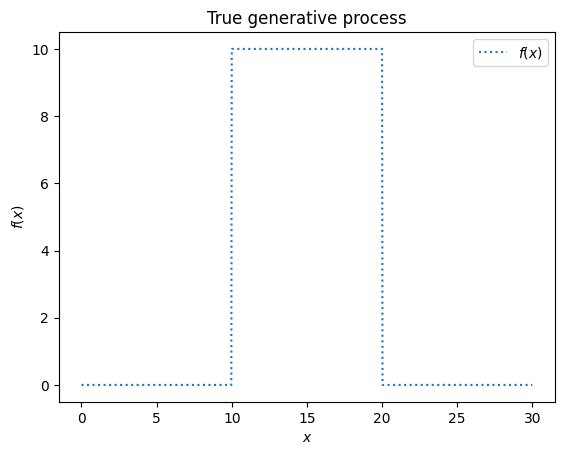

In [65]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [66]:
# rng = np.random.RandomState(42)
# training_indices = rng.choice(np.arange(y.size), size=4, replace=False)
# training_indices = np.array([0,1,12,15,18,28,29])
training_indices = np.array([12,15,18])
training_indices = training_indices * 1000 // 30

X_train, y_train = X[training_indices], y[training_indices]

In [67]:
X_train

array([[12.01201201],
       [15.01501502],
       [18.01801802]])

In [71]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel

# kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# kernel = Matern(nu=2.5)
kernel = ConstantKernel(2, constant_value_bounds='fixed') + Matern(length_scale=5.0, length_scale_bounds='fixed', nu=2)
# kernel = RBF(length_scale=1.0, length_scale_bounds='fixed')
# kernel = WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1)) + kernel
# kernel = RBF(length_scale=2.5, length_scale_bounds=(2.5,2.5))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=0, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

1.41**2 + Matern(length_scale=5, nu=2)

In [72]:
gaussian_process.kernel_.get_params()

{'k1': 1.41**2,
 'k2': Matern(length_scale=5, nu=2),
 'k1__constant_value': 2,
 'k1__constant_value_bounds': 'fixed',
 'k2__length_scale': 5.0,
 'k2__length_scale_bounds': 'fixed',
 'k2__nu': 2}

/Users/levinbrinkmann/repros/artificial-culture-model/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


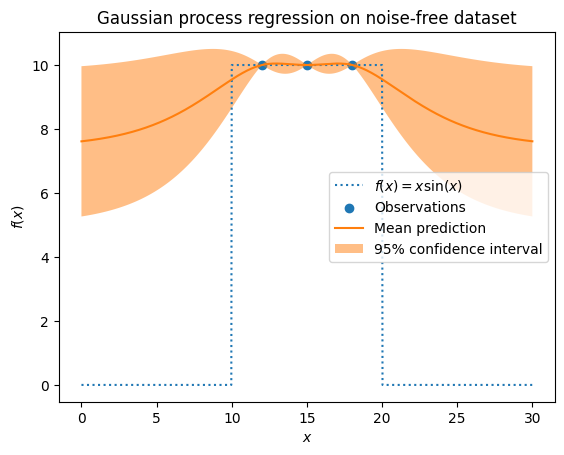

In [73]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")